In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
data.to_csv("EastWestAirlines.csv",index=False)
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
data[data.duplicated()].sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [6]:
data=data.apply(pd.to_numeric,errors='coerce')

In [7]:
data.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [8]:
data.drop(["ID#"], axis=1, inplace=True)

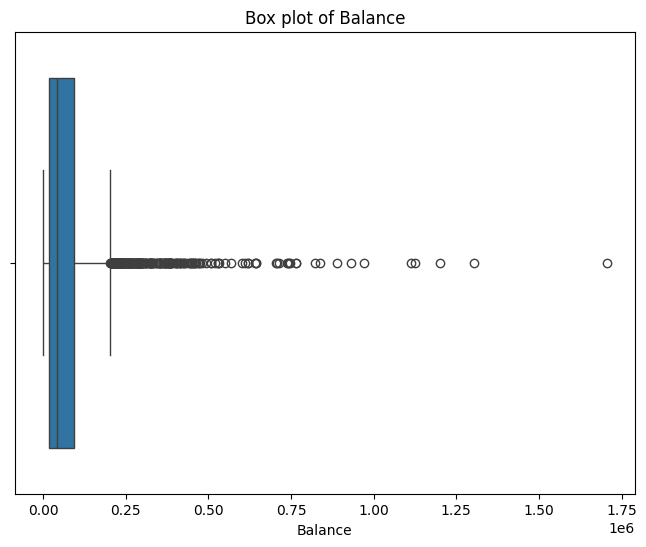

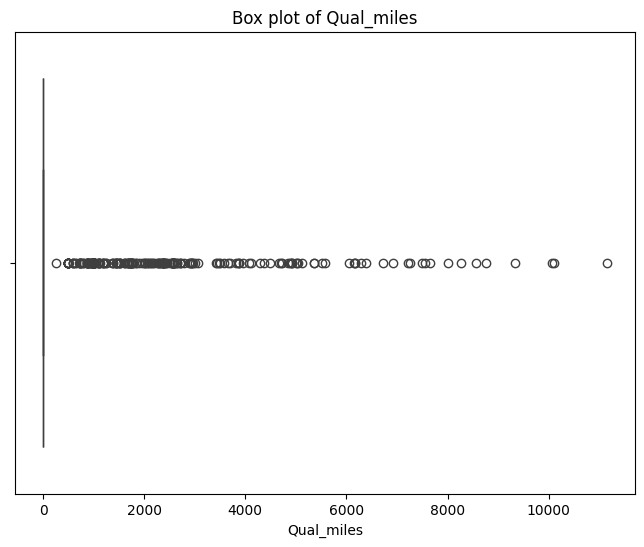

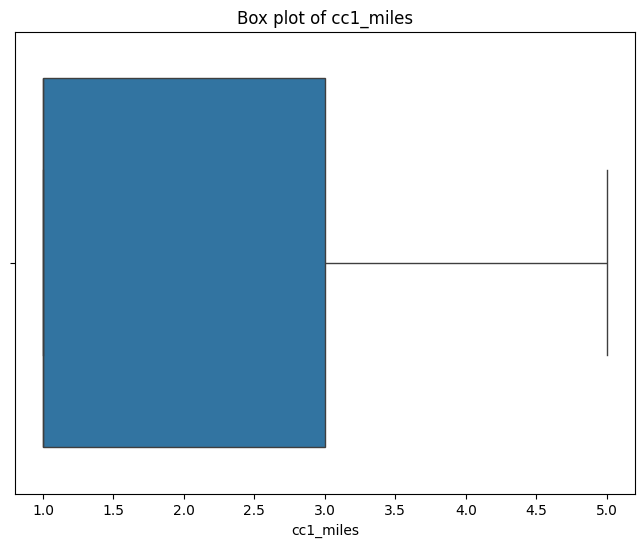

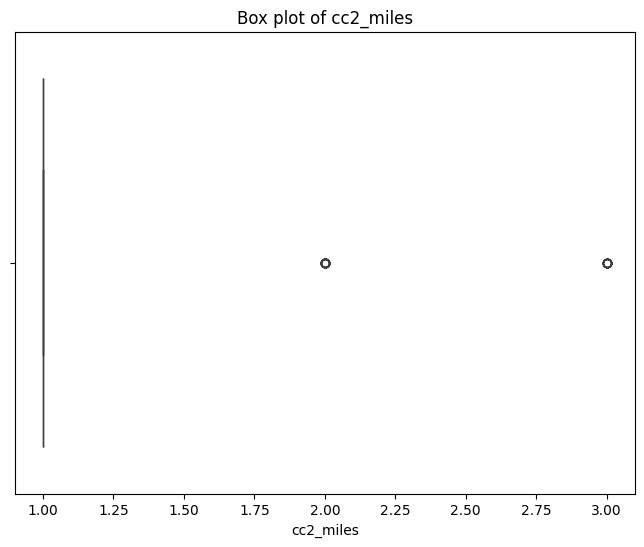

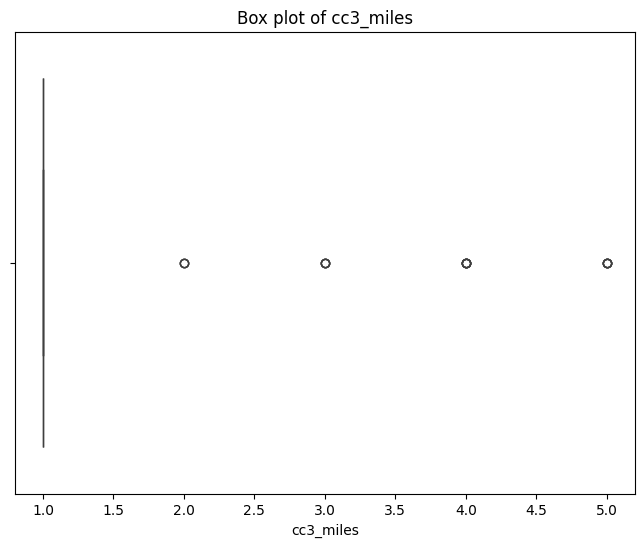

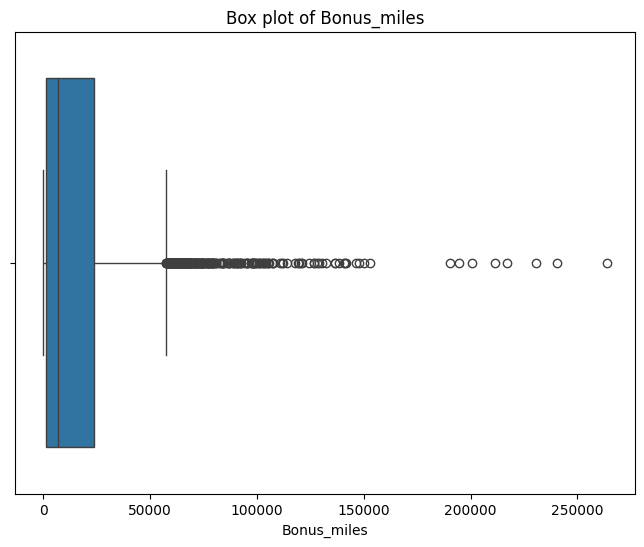

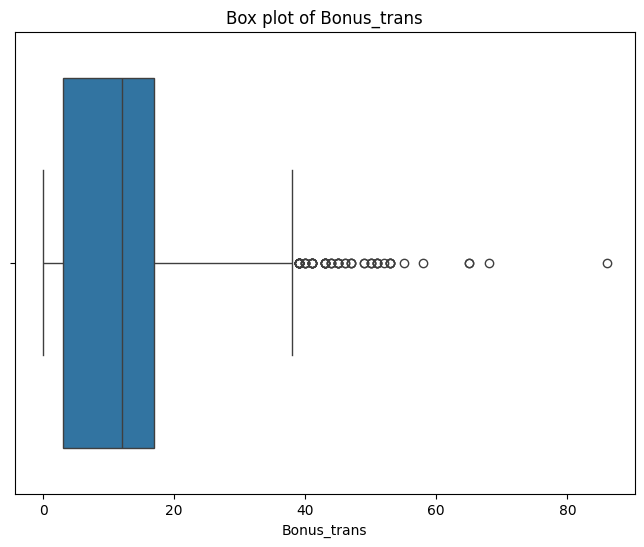

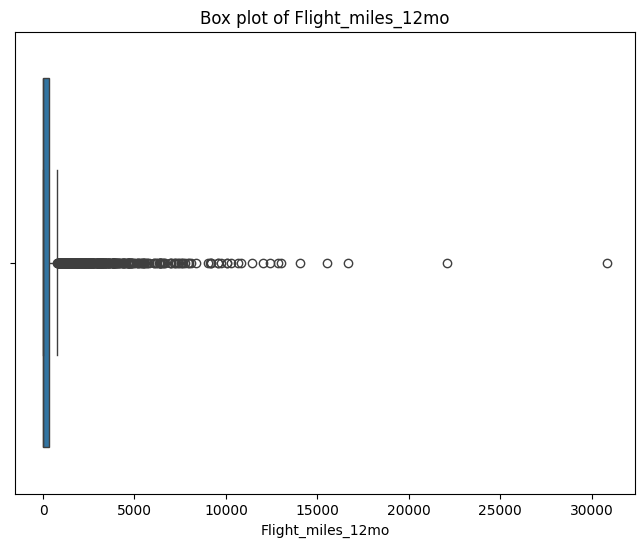

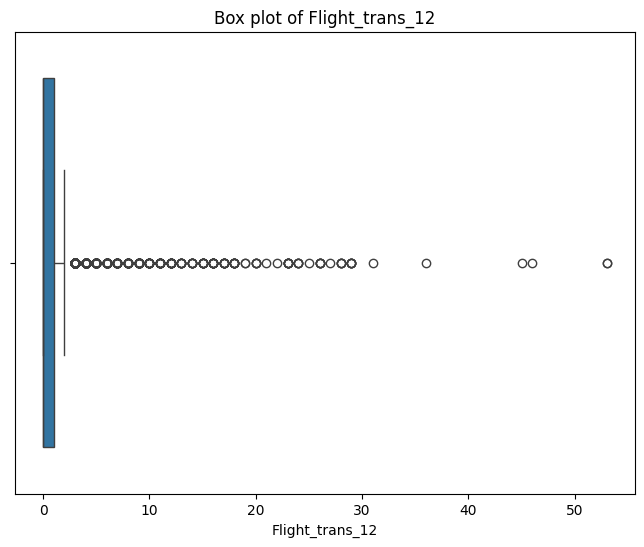

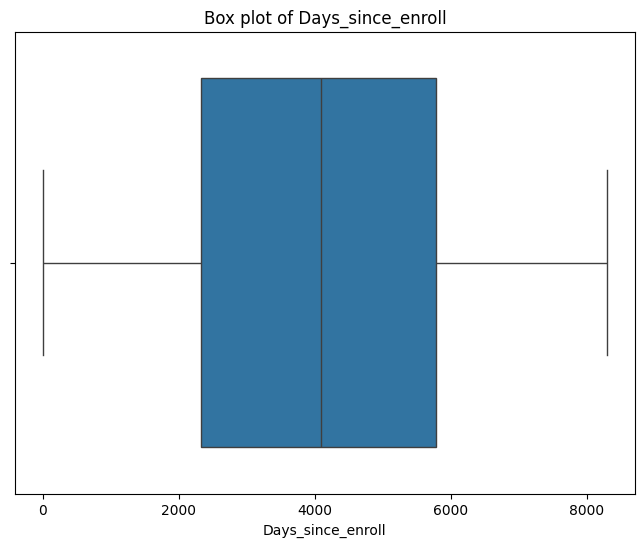

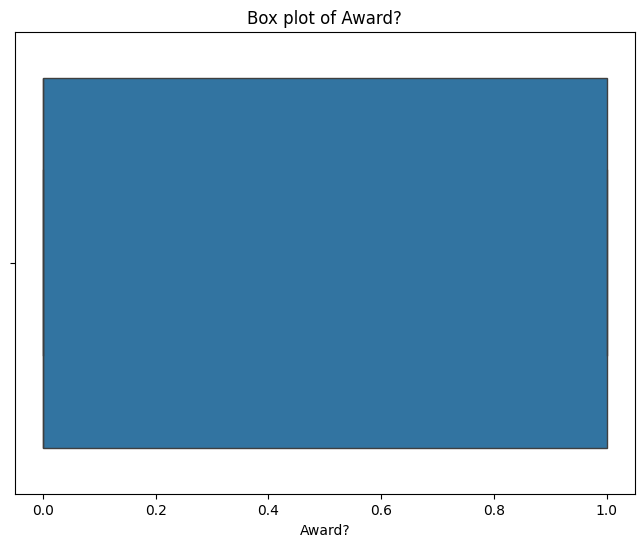

In [9]:
# Check for duplicate rows
data[data.duplicated()].sum()

# Generate box plots for numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [11]:
data['Balance']=data['Balance'].fillna(data['Balance'].median())
data['Qual_miles']=data['Qual_miles'].fillna(data['Qual_miles'].median())
data['cc1_miles']=data['cc1_miles'].fillna(data['cc1_miles'].median())
data['cc2_miles']=data['cc2_miles'].fillna(data['cc2_miles'].median())
data['cc3_miles']=data['cc3_miles'].fillna(data['cc3_miles'].median())
data['Bonus_miles']=data['Bonus_miles'].fillna(data['Bonus_miles'].median())
data['Bonus_trans']=data['Bonus_trans'].fillna(data['Bonus_trans'].median())
data['Flight_miles_12mo']=data['Flight_miles_12mo'].fillna(data['Flight_miles_12mo'].median())
data['Flight_trans_12']=data['Flight_trans_12'].fillna(data['Flight_trans_12'].median())
data['Days_since_enroll']=data['Days_since_enroll'].fillna(data['Days_since_enroll'].median())
data['Award?']=data['Award?'].fillna(data['Award?'].median())

In [12]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
df_norm=norm_func(data.iloc[:,1:])

In [14]:
df_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


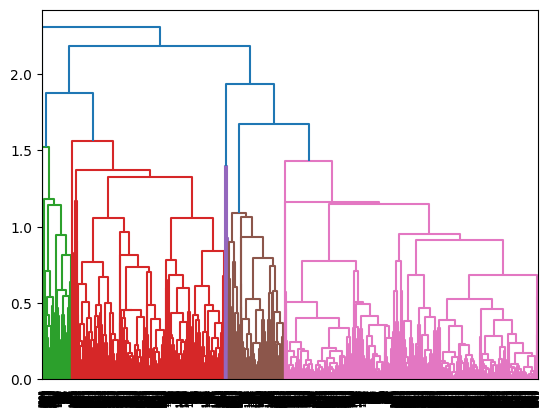

In [15]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [16]:
# create hierarchical clusters
hc = AgglomerativeClustering(n_clusters=4,linkage = 'average',metric='euclidean')

In [17]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [18]:
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


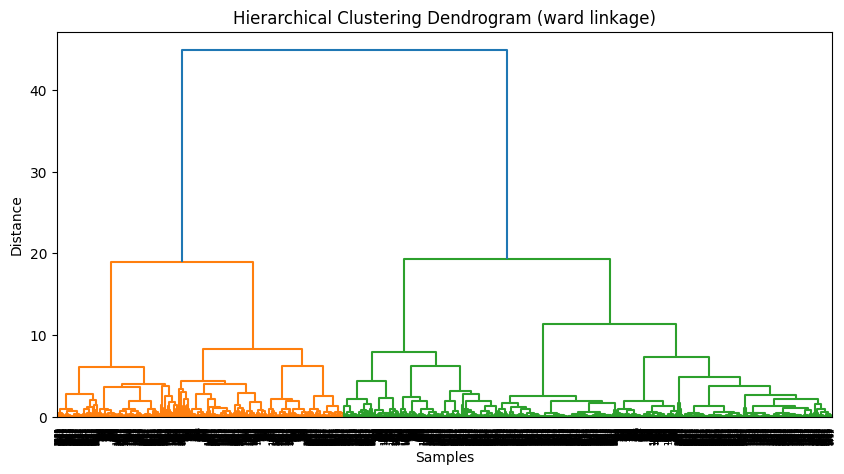

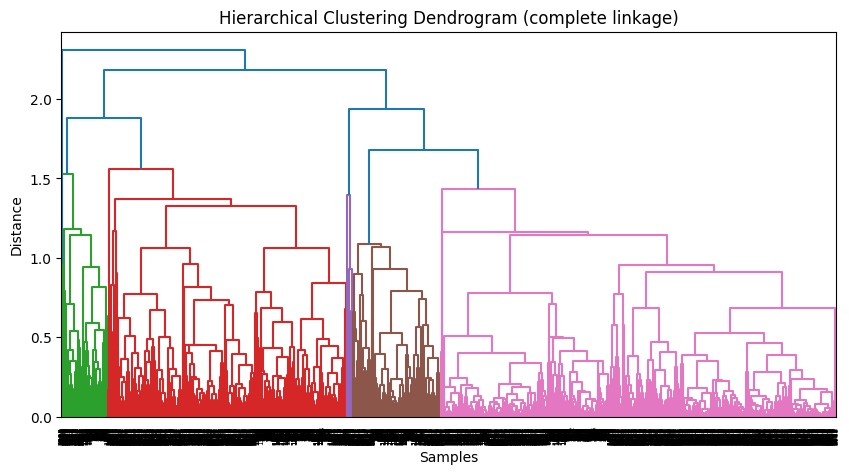

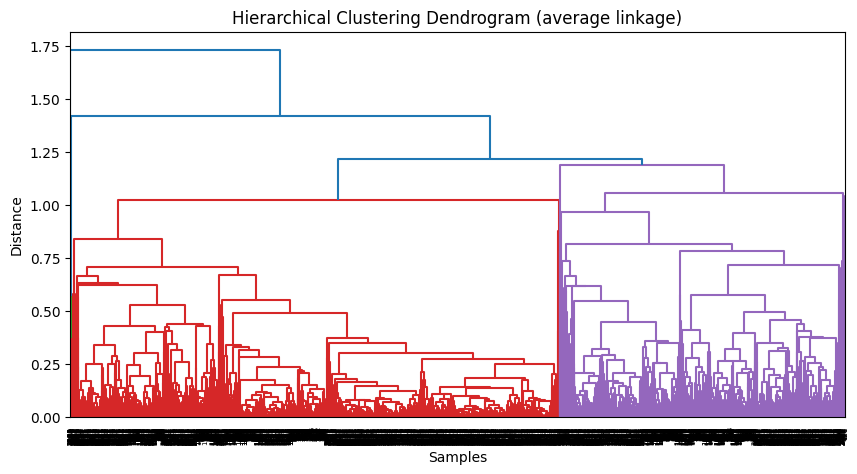

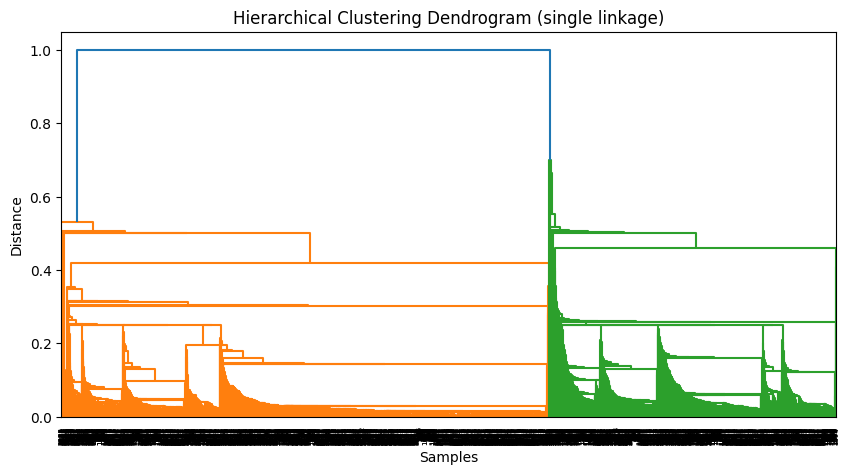

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:
    Z = linkage(df_norm, method=method)  # X is your standardized data
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()


In [20]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [21]:
data['cluster_id']=hc.labels_
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [22]:
data=pd.read_csv("EastWestAirlines.csv",index_col=0)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


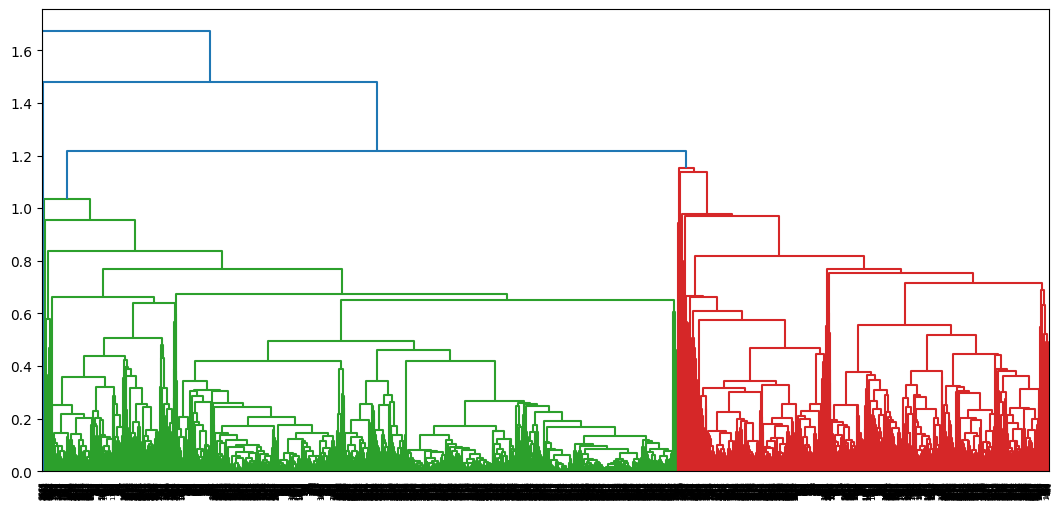

In [23]:
fig=plt.figure(figsize=(13,6))
dendrogram = sch.dendrogram(sch.linkage(norm_func(data), method='average'),labels=data.index)

In [24]:
df_norm.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [25]:
model=KMeans(n_clusters=4).fit(df_norm)
model.inertia_

424.23958175996034

In [26]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

WCSS=[]
for k in range(1,11):
  model=KMeans(n_clusters=k).fit(df_norm)
  WCSS.append(model.inertia_)

WCSS

[1816.8234864503247,
 810.1510478666022,
 621.7690413824885,
 424.23636139361736,
 336.5067937245358,
 330.9701509501053,
 275.990437351478,
 265.9004773192131,
 239.06734602226638,
 214.43125577925284]

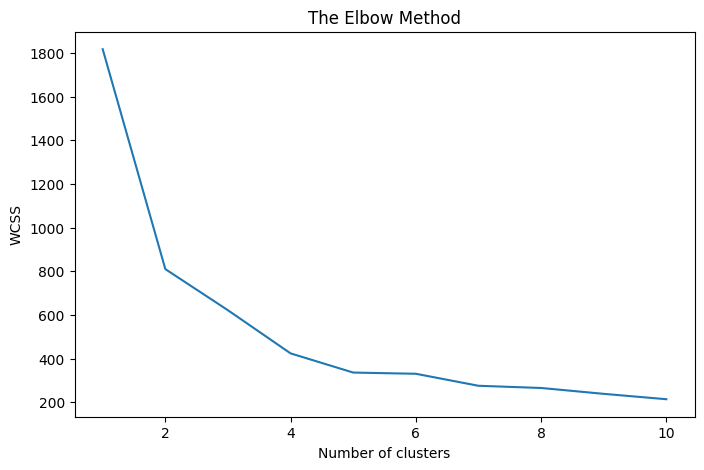

In [27]:
fig=plt.figure(figsize=(8,5))
plt.plot(range(1,11),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [28]:
clf=KMeans(n_clusters=4)
clf.fit(df_norm)


KMeans(n_clusters=4)

In [29]:
y_names=clf.fit_predict(df_norm)
y_names

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [30]:
clf.cluster_centers_

array([[ 1.52486428e-02,  6.40243902e-01,  3.46944695e-18,
         3.38753388e-03,  1.27802734e-01,  2.20110922e-01,
         1.85944248e-02,  3.28271207e-02,  3.89285885e-01,
         1.00000000e+00],
       [ 7.85813260e-03,  1.76330421e-01,  6.94996029e-03,
         2.18427323e-03,  3.87875269e-02,  1.06313612e-01,
         7.34309944e-03,  1.23113582e-02,  4.60411394e-01,
        -8.93729535e-15],
       [ 2.60542873e-02,  3.90044577e-02,  1.63447251e-02,
         2.22882615e-03,  3.35642727e-02,  1.21825219e-01,
         3.34267751e-02,  5.94073285e-02,  5.22892182e-01,
         1.00000000e+00],
       [ 1.99283935e-02,  8.03530752e-01,  1.13895216e-03,
         9.11161731e-03,  2.10935634e-01,  2.47338030e-01,
         2.69980116e-02,  4.68044870e-02,  7.51603789e-01,
         1.00000000e+00]])

In [31]:
clf.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [32]:
clf.inertia_

588.5065146364434

In [33]:
md=pd.Series(y_names)
df_norm['clust']=md
df_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


In [34]:
df_norm.groupby(df_norm.clust).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,
0,0.015249,0.640244,0.000000,0.003388,0.127803,0.220111,0.018594,0.032827,0.389286,1.0
1,0.007858,0.176330,0.006950,0.002184,0.038788,0.106314,0.007343,0.012311,0.460411,0.0
2,0.026054,0.039004,0.016345,0.002229,0.033564,0.121825,0.033427,0.059407,0.522892,1.0
3,0.019928,0.803531,0.001139,0.009112,0.210936,0.247338,0.026998,0.046804,0.751604,1.0


<Axes: xlabel='Qual_miles', ylabel='Bonus_miles'>

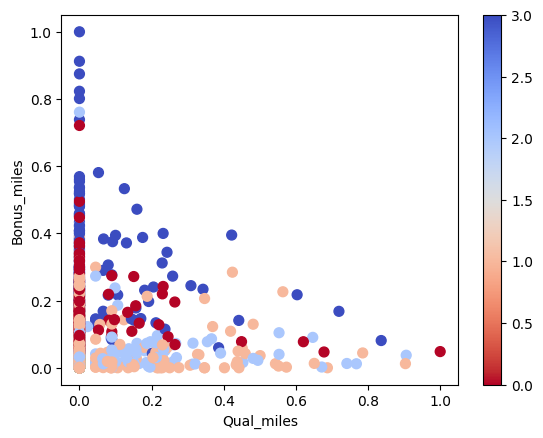

In [35]:
df_norm.plot("Qual_miles","Bonus_miles",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

In [36]:
data['clust']=md
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1.0
2,19244,0,1,1,1,215,2,0,0,6968,0,1.0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1.0
4,14776,0,1,1,1,500,1,0,0,6952,0,3.0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,NaN
4018,64385,0,1,1,1,981,5,0,0,1395,1,NaN
4019,73597,0,3,1,1,25447,8,0,0,1402,1,NaN


<Axes: xlabel='Balance', ylabel='Bonus_trans'>

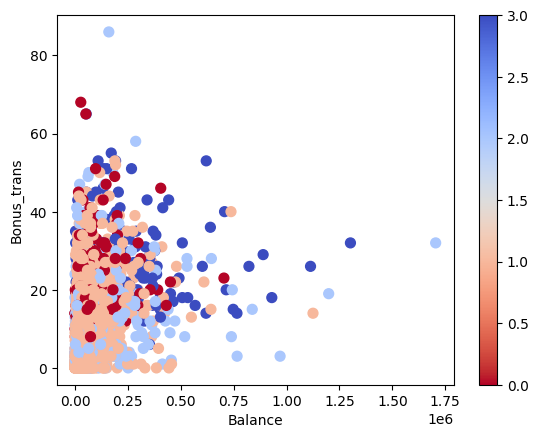

In [37]:
data.plot("Balance","Bonus_trans",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

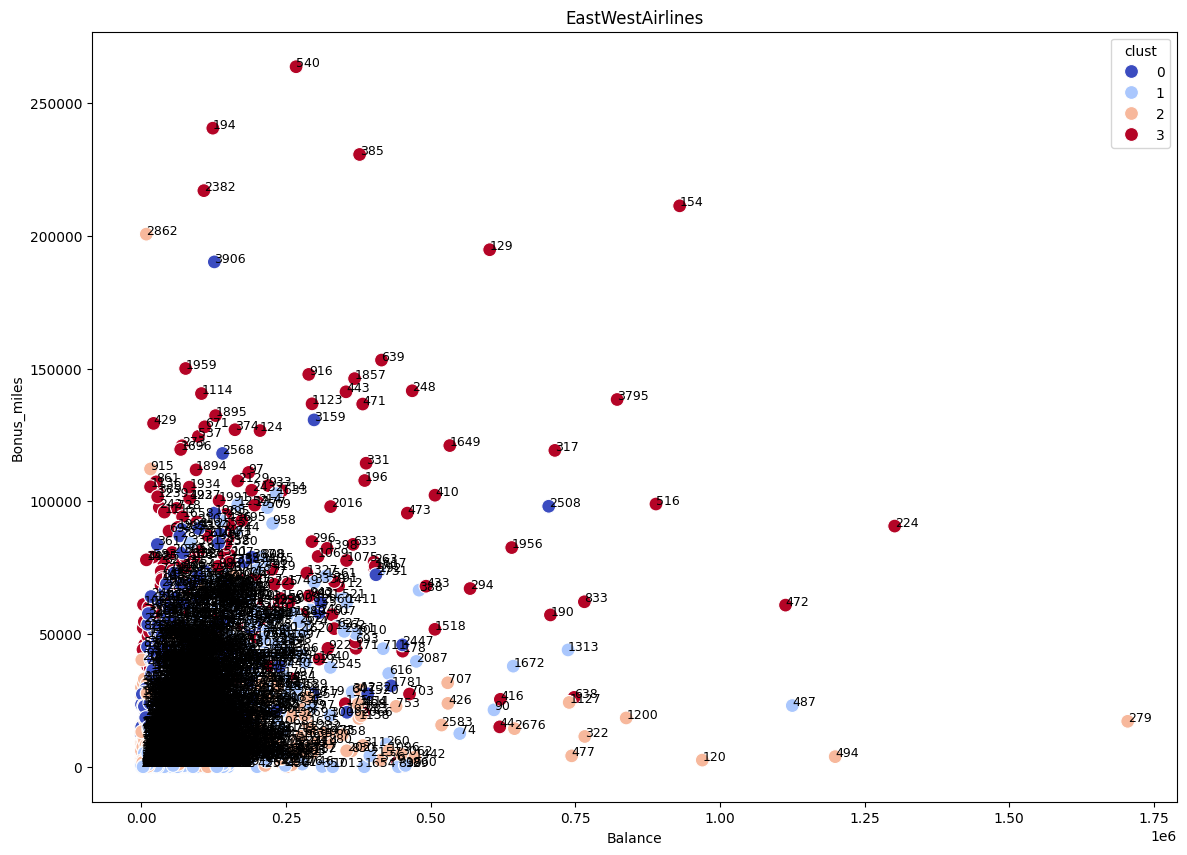

In [38]:
# k-means cluster labels to the original data
data['clust'] = y_names


plt.figure(figsize=(14, 10))
sns.scatterplot(x="Balance", y="Bonus_miles", hue="clust", data=data, palette="coolwarm", s=100)


for i in range(data.shape[0]):
    plt.text(data['Balance'].iloc[i], data['Bonus_miles'].iloc[i], str(data.iloc[i].name), fontsize=9)

plt.title("EastWestAirlines")
plt.xlabel("Balance")
plt.ylabel("Bonus_miles")
plt.show()

In [39]:
data.values

array([[28143,     0,     1, ...,  7000,     0,     1],
       [19244,     0,     1, ...,  6968,     0,     1],
       [41354,     0,     1, ...,  7034,     0,     1],
       ...,
       [73597,     0,     3, ...,  1402,     1,     0],
       [54899,     0,     1, ...,  1401,     0,     1],
       [ 3016,     0,     1, ...,  1398,     0,     1]])

In [40]:
array=data.values
array

array([[28143,     0,     1, ...,  7000,     0,     1],
       [19244,     0,     1, ...,  6968,     0,     1],
       [41354,     0,     1, ...,  7034,     0,     1],
       ...,
       [73597,     0,     3, ...,  1402,     1,     0],
       [54899,     0,     1, ...,  1401,     0,     1],
       [ 3016,     0,     1, ...,  1398,     0,     1]])

In [41]:
stscaler=StandardScaler().fit(array)
x=stscaler.transform(array)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -3.77728753e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -3.77728753e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -3.77728753e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -1.65567908e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -3.77728753e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -3.77728753e-01]])

In [42]:
dbscan=DBSCAN(eps=0.9,min_samples=6)
dbscan.fit(x)

DBSCAN(eps=0.9, min_samples=6)

In [43]:
dbscan.fit_predict(x)

array([0, 0, 0, ..., 3, 0, 0])

In [44]:
dbscan.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [45]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [46]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,3
3997,0


In [47]:
pd.concat([data,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,cluster
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,1.0,0.0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,1.0,0.0
3,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,1.0,0.0
4,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,1.0,-1.0
5,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


<Axes: xlabel='Balance', ylabel='Bonus_miles'>

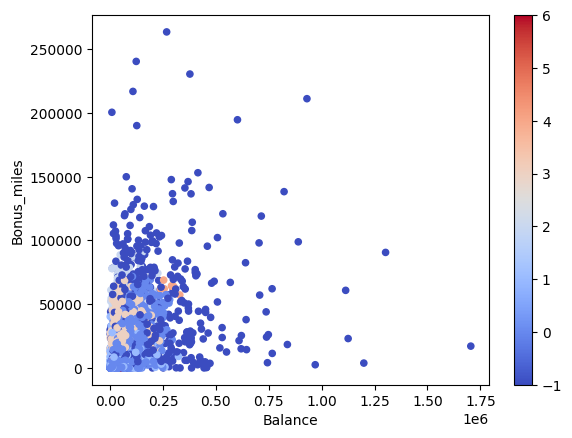

In [48]:
data.plot(x='Balance',y='Bonus_miles',c=dbscan.labels_,kind='scatter',cmap='coolwarm')

In [49]:
from sklearn.metrics import silhouette_score
silhouette_score(x,dbscan.labels_)

np.float64(0.2106655160941276)

In [50]:
from sklearn.neighbors import NearestNeighbors

In [51]:
neigh=NearestNeighbors()
nbrs=neigh.fit(x)
distances,indices=nbrs.kneighbors(x)

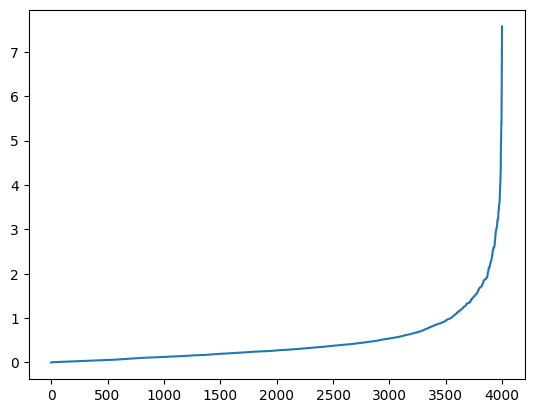

In [52]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)


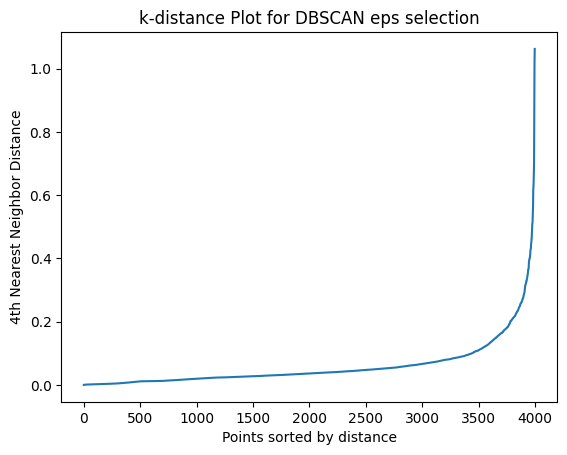

In [54]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)  # min_samples typically 4-5
neighbors_fit = neighbors.fit(df_norm)
distances, indices = neighbors_fit.kneighbors(df_norm)
distances = np.sort(distances[:, 4])  # 4th nearest neighbor
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('k-distance Plot for DBSCAN eps selection')
plt.show()


In [55]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # adjust eps based on k-distance plot
labels = dbscan.fit_predict(df_norm)

# Evaluate clusters (ignoring noise points labeled -1)
from sklearn.metrics import silhouette_score
mask = labels != -1
if np.sum(mask) > 1:
    sil_score = silhouette_score(df_norm[mask], labels[mask])
    print("Silhouette Score (DBSCAN):", sil_score)


Silhouette Score (DBSCAN): 0.3612768715074411
